### Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

First, let's read our data in to DataFrame

In [3]:
smoothed_rate_df = pd.read_csv('./Data/smoothed_rate_df.csv')

In [4]:
total_percent_df = pd.read_csv('./Data/total_percent_df.csv')

### Ask Meaningful Questions

**Question**: Sự khác biệt giữa các nhóm dân tộc: Tỷ lệ này khác nhau như thế nào giữa các nhóm dân tộc khác nhau? Có sự khác biệt đáng kể về tỷ lệ giữa các nhóm dân tộc?

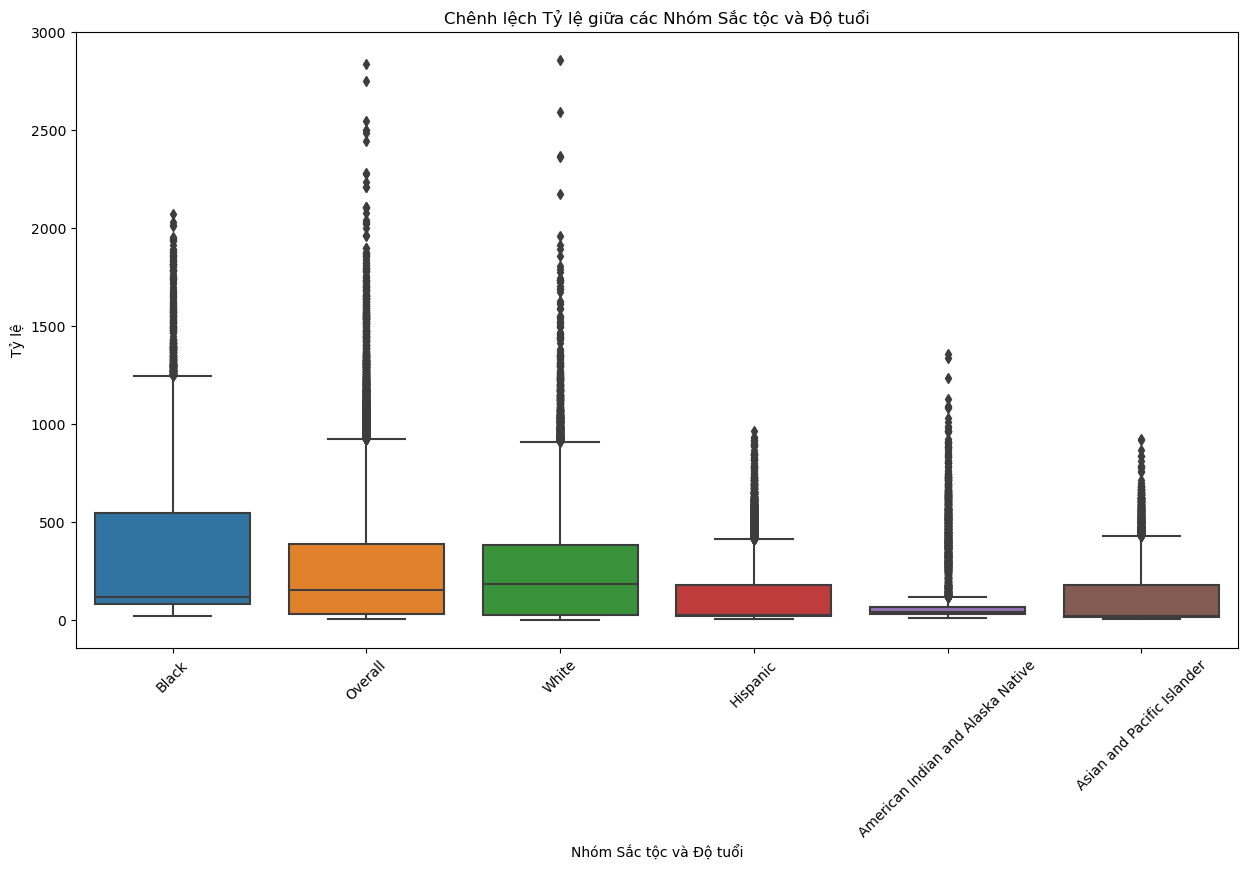

In [5]:
# Đặt kích thước biểu đồ
plt.figure(figsize=(15, 8))

# Vẽ biểu đồ boxplot cho sự chênh lệch giữa các nhóm sắc tộc và độ tuổi
sns.boxplot(x='race/ethnicityage_group', y='data_value', data=smoothed_rate_df)

# Đặt tiêu đề và nhãn trục
plt.title('Chênh lệch Tỷ lệ giữa các Nhóm Sắc tộc và Độ tuổi')
plt.xlabel('Nhóm Sắc tộc và Độ tuổi')
plt.ylabel('Tỷ lệ')

# Hiển thị biểu đồ
plt.xticks(rotation=45)
plt.show()


In [6]:
group_stats = smoothed_rate_df.groupby('race/ethnicityage_group')['data_value'].describe()
group_stats

,count,mean,std,min,25%,50%,75%,max
race/ethnicityage_group,,,,,,,,
American Indian and Alaska Native,6260.0,100.642444,155.028866,13.3,32.6,42.80,65.90,1359.3
Asian and Pacific Islander,10480.0,96.427586,144.417575,6.1,14.7,18.80,180.40,922.1
Black,35760.0,309.248115,317.167526,19.0,80.8,118.80,547.15,2072.6
Hispanic,21100.0,107.764024,152.844262,7.8,20.6,27.40,177.00,965.7
Overall,298082.0,227.562356,222.689259,4.0,31.5,155.30,388.10,2837.0
White,101000.0,223.108285,216.929488,3.1,28.8,181.85,381.40,2857.9


  **Comments:**
Dựa vào Box Plots và group_stats trên, ta rút ra được:

- **Tỷ lệ Nhóm Mắc Bệnh:**
  - Nhóm White có tỷ lệ mắc bệnh cao nhất.
  - Nhóm Asian and Pacific Islander có tỷ lệ mắc bệnh thấp nhất.
  - Nhóm Black có sự biến động lớn và tỷ lệ mắc bệnh cao.

- **Biến Động:**
  - Nhóm Black có sự biến động nhiều nhất.
  - Nhóm Overall và White có sự tương đồng trong box plot, thể hiện sự ổn định hơn.

- **Phân Bố Lệch Phải:**
  - Hầu hết các box plot đều có phân bố lệch phải, cho thấy có một số cá nhân có mức độ mắc bệnh cao.

- **Outliers:**
  - Các nhóm đều có nhiều outliers ở phía trên, nhưng nhóm Overall và White có số lượng outliers cao nhất.

  **Lợi Ích:**
- Hiểu rõ hơn về biến động và phân phối của dữ liệu trong từng nhóm sắc tộc.
- Đưa ra những hướng điều trị và quản lý sức khỏe có thể được tối ưu hóa cho từng nhóm.
- Cung cấp thông tin quan trọng để định hình chính sách y tế cộng đồng, đặc biệt là trong việc giảm chênh lệch sức khỏe giữa các nhóm.

**Question**: Có tỷ lệ thay đổi nào theo độ tuổi từ năm 2000-2010 so với năm 2010-2019?
Có sự chênh lệch đáng kể giữa các nhóm độ tuổi không?

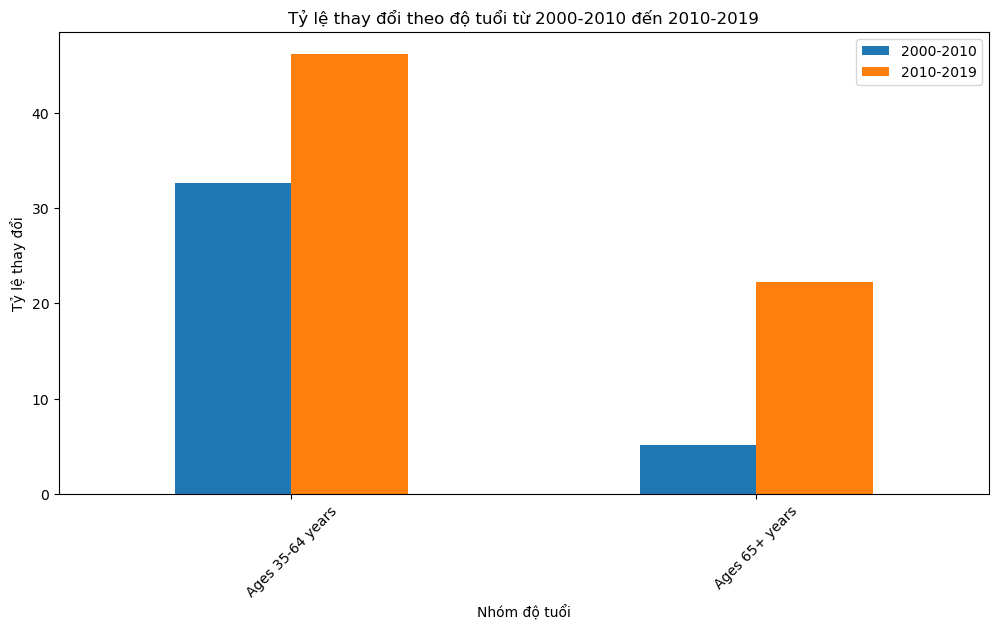

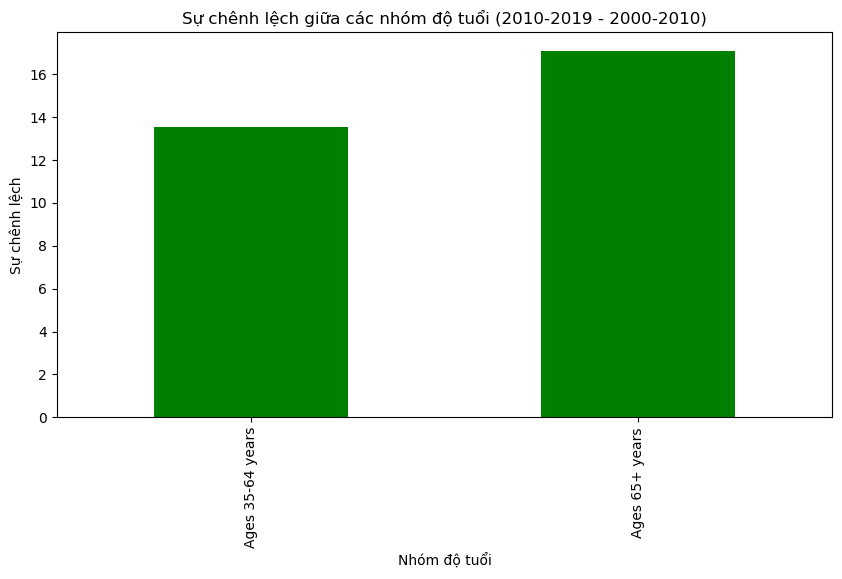

In [10]:
# Tính tỷ lệ thay đổi theo độ tuổi từ năm 2000-2010 đến năm 2010-2019
change_by_age_group = total_percent_df.groupby(['age_group', 'year']).agg({'data_value': 'mean'}).unstack()

# Tính sự chênh lệch giữa các nhóm độ tuổi
age_group_diff = change_by_age_group['data_value']['2010-2019'] - change_by_age_group['data_value']['2000-2010']

# Vẽ biểu đồ tỷ lệ thay đổi theo độ tuổi
change_by_age_group.plot(kind='bar', figsize=(12, 6), rot=45)
plt.title('Tỷ lệ thay đổi theo độ tuổi từ 2000-2010 đến 2010-2019')
plt.xlabel('Nhóm độ tuổi')
plt.ylabel('Tỷ lệ thay đổi')
plt.legend(['2000-2010', '2010-2019'])
plt.show()

# Vẽ biểu đồ sự chênh lệch giữa các nhóm độ tuổi
age_group_diff.plot(kind='bar', figsize=(10, 5), color=['red' if x < 0 else 'green' for x in age_group_diff])
plt.title('Sự chênh lệch giữa các nhóm độ tuổi (2010-2019 - 2000-2010)')
plt.xlabel('Nhóm độ tuổi')
plt.ylabel('Sự chênh lệch')
plt.show()